In [1]:
# read material data
import csv
import numpy as np

# read Si 
lambdas_lumerical = np.array(np.genfromtxt('Si_eps_re.txt', delimiter=',', skip_header=3, usecols=(0,)))
eps_re = np.array(np.genfromtxt('Si_eps_re.txt', delimiter=',', skip_header=3, usecols=(1,)))
eps_im = np.array(np.genfromtxt('Si_eps_im.txt', delimiter=',', skip_header=3, usecols=(1,)))

ordering = lambdas_lumerical.argsort()
si_lumerical_data = np.array([
    lambdas_lumerical[ordering],
    eps_re[ordering],
    eps_im[ordering]
])

# read SiO2
lambdas_lumerical = np.array(np.genfromtxt('SiO2_eps_re.txt', delimiter=',', skip_header=3, usecols=(0,)))
eps_re = np.array(np.genfromtxt('SiO2_eps_re.txt', delimiter=',', skip_header=3, usecols=(1,)))
eps_im = np.array(np.genfromtxt('SiO2_eps_im.txt', delimiter=',', skip_header=3, usecols=(1,)))

ordering = lambdas_lumerical.argsort()
sio2_lumerical_data = np.array([
    lambdas_lumerical[ordering],
    eps_re[ordering],
    eps_im[ordering]
])

# fit Si
from tidy3d.plugins.dispersion import FastDispersionFitter, AdvancedFastFitterParam

# max/min wavelengths
wvl_max = 1.6
wvl_min = 1.4
ind_1 = len(si_lumerical_data[0][si_lumerical_data[0] < wvl_min]) - 1
ind_2 = len(si_lumerical_data[0][si_lumerical_data[0] < wvl_max]) + 1
fitter_si = FastDispersionFitter.from_complex_permittivity(
    wvl_um=si_lumerical_data[0][ind_1:ind_2], 
    eps_real=si_lumerical_data[1][ind_1:ind_2], 
    eps_imag=si_lumerical_data[2][ind_1:ind_2]
)

fitter_si = fitter_si.copy(update={"wvl_range": (wvl_min, wvl_max)})
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, loss_bounds=(-1e-5, 2e-2))
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, relaxed=True, logspacing=False)
Si_lumerical, rms_error = fitter_si.fit(max_num_poles=20, advanced_param=advanced_param, tolerance_rms=2e-5)


# fit SiO2
ind_1 = len(sio2_lumerical_data[0][sio2_lumerical_data[0] < wvl_min]) - 1
ind_2 = len(sio2_lumerical_data[0][sio2_lumerical_data[0] < wvl_max]) + 1
fitter_sio2 = FastDispersionFitter.from_complex_permittivity(
    wvl_um=sio2_lumerical_data[0][ind_1:ind_2], 
    eps_real=sio2_lumerical_data[1][ind_1:ind_2], 
    eps_imag=sio2_lumerical_data[2][ind_1:ind_2]
)

fitter_sio2 = fitter_sio2.copy(update={"wvl_range": (wvl_min, wvl_max)})
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100)
advanced_param = AdvancedFastFitterParam(weights=(1,1), passivity_num_iters=100, relaxed=True, logspacing=False)
SiO2_lumerical, rms_error = fitter_sio2.fit(max_num_poles=20, advanced_param=advanced_param, tolerance_rms=2e-5)

Output()

Output()

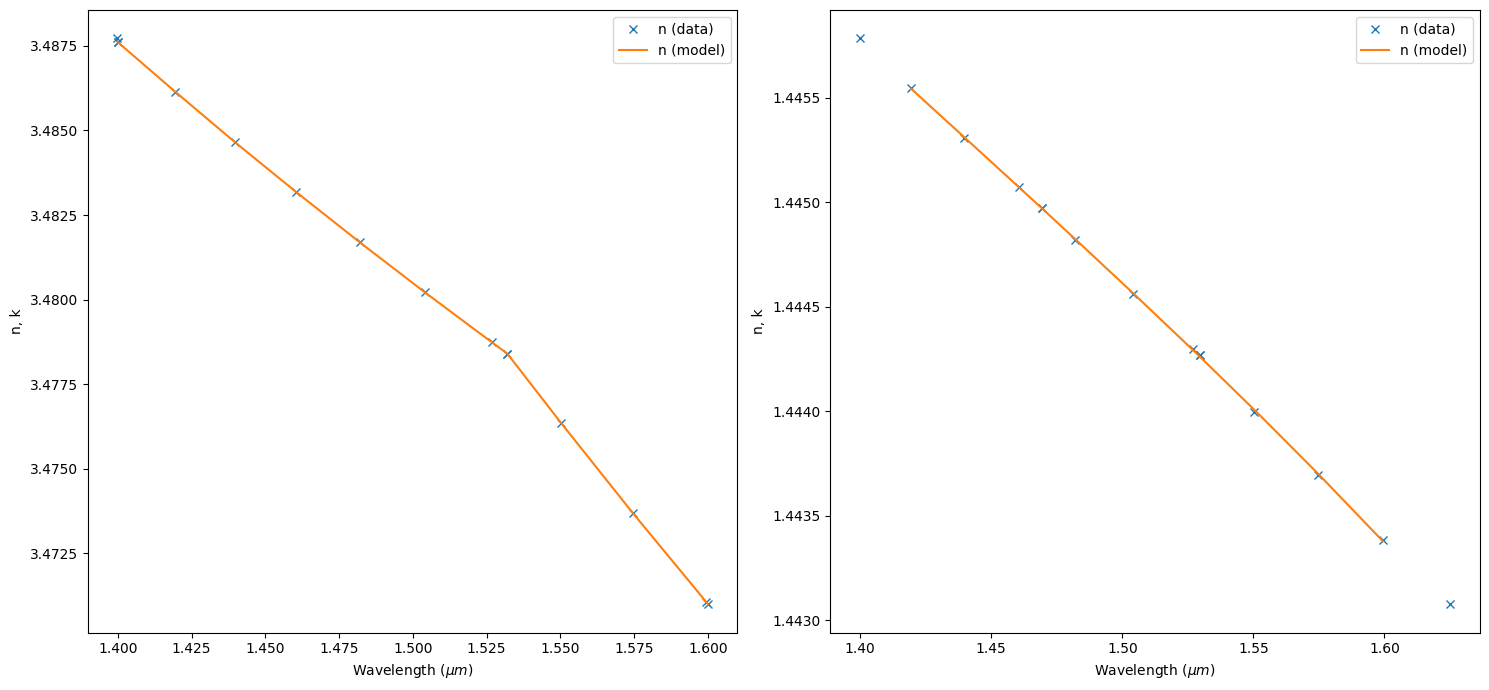

In [2]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 2, figsize=(15, 7))
fitter_si.plot(Si_lumerical, ax=ax[0])
#ax[0].set_ylim([-1e-4,0.002])

fitter_sio2.plot(SiO2_lumerical, ax=ax[1])
#ax[1].set_xlim([1,2])
plt.tight_layout()
plt.show()

In [3]:
# save data to json
Si_lumerical.to_file("fitted_si.json")
SiO2_lumerical.to_file("fitted_sio2.json")

In [5]:
import tidy3d as td
print(fitter_si.lossy)
print(Si_lumerical.eps_model(frequency=td.C_0 / 1.55))
print(Si_lumerical)

False
(12.193990500708345+0.046273930565774j)
td.PoleResidue(
	eps_inf=1.0, 
	poles=(((-4.603612995722933e+17+0j), (-222896931259434.4+0j)), ((-53165172758725.89+0j), (3544219335600.1777+0j)), ((-12721821545972.275-1167707210221482.2j), (190010843939447.78-132623703087730.88j)), ((-13996024981195.027-1355564816059477.2j), (1122499394755468.9-310962932823864.2j)), ((-12440198487901.197-1183858318828830.8j), (196898978321085.47-184648525741036.56j)), ((-15441583990409.332-1340974469501279.5j), (-1551476534846603+341125570456746.8j)), ((-12299882723606.117-1198641748976720j), (221887232810015.6-414016467371143j)), ((-13344129213158.08-1326294609949093.8j), (-517346487650480.75-3173968076099804j)), ((-13717267364210.5-1213352928227461j), (17231022547920.13-765924079990644.8j)), ((-14576224273047.78-1311228442314323.2j), (5680986690738397-4213543494130616.5j)), ((-15684150133628.947-1227930368467851.5j), (-380638822683385.25-1233323663918418.2j)), ((-14639899301939.428-1299046078740091.5j),